## Import Modules

In [4]:
import pandas as pd 
import numpy as np 
from matplotlib import pyplot as plt 
import seborn as sns

ModuleNotFoundError: No module named 'seborn'

## Training set

In [63]:
ch = pd.read_csv('compiled_data_v3/x_phot.csv' , index_col='name')
ch_id = pd.read_csv('compiled_data_v3/id_frame.csv' , index_col='name')
ch.insert(0 , 'class' , ch_id['class'].to_list())
ch.insert(1 , 'offset' , ch_id['offset'].to_list())
ch.insert(2 , 'significance' , ch_id['significance'].to_list())
#ch = ch[ch['offset']<1.01]
ch = ch[ch['significance']>3]
ch 

,class,offset,significance,gal_b2,gal_l2,hard_hs,hard_hm,hard_ms,var_inter_prob_b,var_inter_sigma_b,...,Rp,B-R,G-J,G-W2,Bp-H,Bp-W3,Rp-K,J-H,J-W1,W1-W2
name,,,,,,,,,,,,,,,,,,,,,
2CXO J002359.4-720438,CV,0.000218,3.428571,-44.891974,305.906836,-0.792005,-0.058713,-0.733292,0.263263,5.507693e-07,...,11.940199,1.095149,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2CXO J174041.4-534004,CV,0.000230,64.727180,-11.955034,338.169913,-0.961899,-0.803248,-0.694566,1.000000,1.093973e-05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2CXO J002409.2-720543,CV,0.000235,6.103520,-44.875913,305.885422,-0.182386,0.089944,-0.266084,0.999984,6.639804e-07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2CXO J002411.1-720620,CV,0.000313,13.755014,-44.866347,305.879929,-0.092442,0.292317,-0.373517,0.830231,1.643134e-05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2CXO J002401.4-720441,CV,0.000319,5.629648,-44.891458,305.903006,-0.999375,-0.999375,-0.684572,0.500566,2.693600e-07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2CXO J203238.0+411244,YSO,9.972372,5.352941,0.820094,80.073280,0.795753,0.296065,0.630856,0.981941,1.888440e-06,...,18.930946,2.791771,4.880680,NaN,7.407217,NaN,5.243946,1.1630,NaN,NaN
2CXO J001444.6-391135,STAR,9.973566,17.544338,-75.716920,332.986199,0.237352,0.196127,0.042473,0.271662,1.389467e-06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2CXO J203307.1+411626,YSO,9.973637,4.258065,0.783466,80.176953,0.628357,0.297314,0.026234,1.000000,5.754500e-07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.9245,NaN,NaN


### Plot various properties

In [64]:
ch.columns.to_list()

['class',
 'offset',
 'significance',
 'gal_b2',
 'gal_l2',
 'hard_hs',
 'hard_hm',
 'hard_ms',
 'var_inter_prob_b',
 'var_inter_sigma_b',
 'var_intra_prob_b',
 'var_inter_index_b',
 'kp_intra_prob_b',
 'var_intra_index_b',
 'var_inter_hard_prob_hs',
 'ks_intra_prob_b',
 'var_inter_hard_sigma_hm',
 'var_inter_hard_prob_ms',
 'var_inter_hard_prob_hm',
 'h-csc',
 'b-csc',
 'm-csc',
 's-csc',
 'u-csc',
 '0p3_8_csc',
 '0p5_2csc',
 'FUV',
 'NUV',
 'u-sdss',
 'g-sdss',
 'r-sdss',
 'i-sdss',
 'z-sdss',
 'W1',
 'W2',
 'W3',
 'W4',
 '2-10 keV (XMM)',
 '4.5 microns (IRAC)',
 '8.0 microns (IRAC)',
 '24 microns (MIPS)',
 'J',
 'H',
 'K',
 '0p5_8_csc',
 '3.6 microns (IRAC)',
 '5.8 microns (IRAC)',
 '1_2_csc',
 'G',
 'Bp',
 'Rp',
 'B-R',
 'G-J',
 'G-W2',
 'Bp-H',
 'Bp-W3',
 'Rp-K',
 'J-H',
 'J-W1',
 'W1-W2']

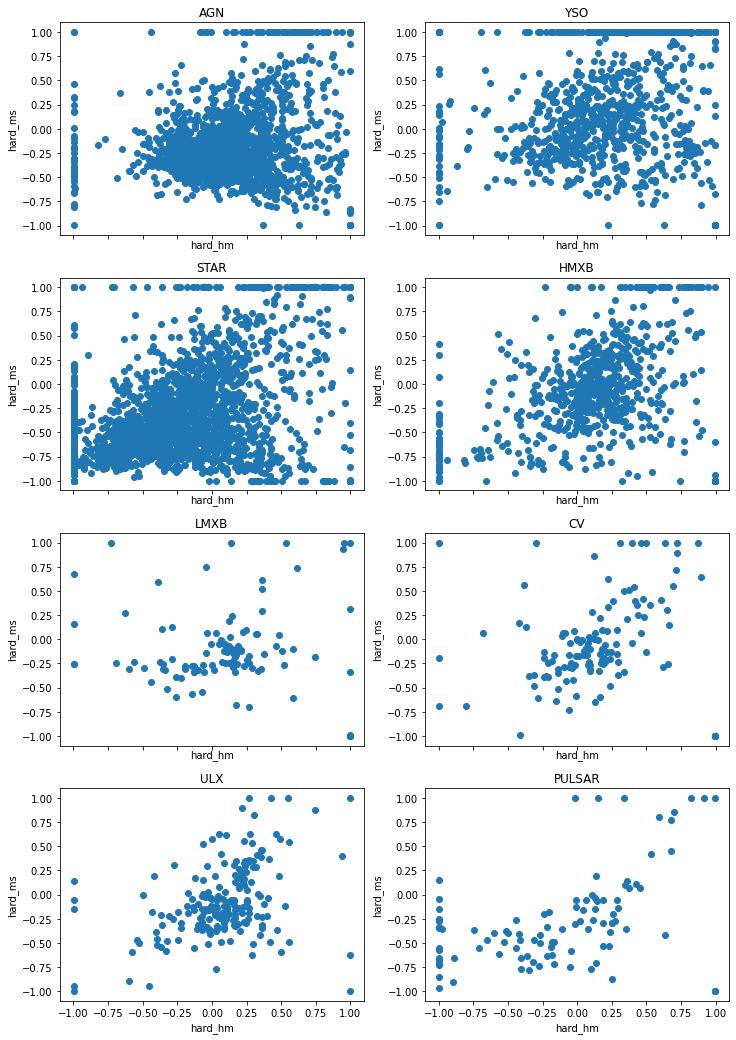

In [28]:
classes = ['AGN' , 'YSO' , 'STAR' , 'HMXB' , 'LMXB' , 'CV' , 'ULX' , 'PULSAR']
nrows  , ncols = 4 , 2 
fig , ax = plt.subplots(nrows=nrows , ncols=ncols , figsize=(12,18) ,sharex=True)
to_plot = ['hard_hm' , 'hard_ms']
cl = np.reshape(classes, ax.shape)
df = ch.copy()
for i in range(nrows):
    for j in range(ncols):
        temp = df[df['class']==cl[i][j]]
        if(len(to_plot)==1):
            ax[i][j].hist(temp[to_plot[0]] , label = cl[i][j])
            ax[i][j].hist(temp[to_plot[0]] , label = cl[i][j])
            ax[i][j].set_xlabel(to_plot[0])
        else:
            ax[i][j].scatter(temp[to_plot[0]] , temp[to_plot[1]] , label = cl[i][j])
            ax[i][j].set_xlabel(to_plot[0])
            ax[i][j].set_ylabel(to_plot[1])
        ax[i][j].set_title(cl[i][j])
plt.show()


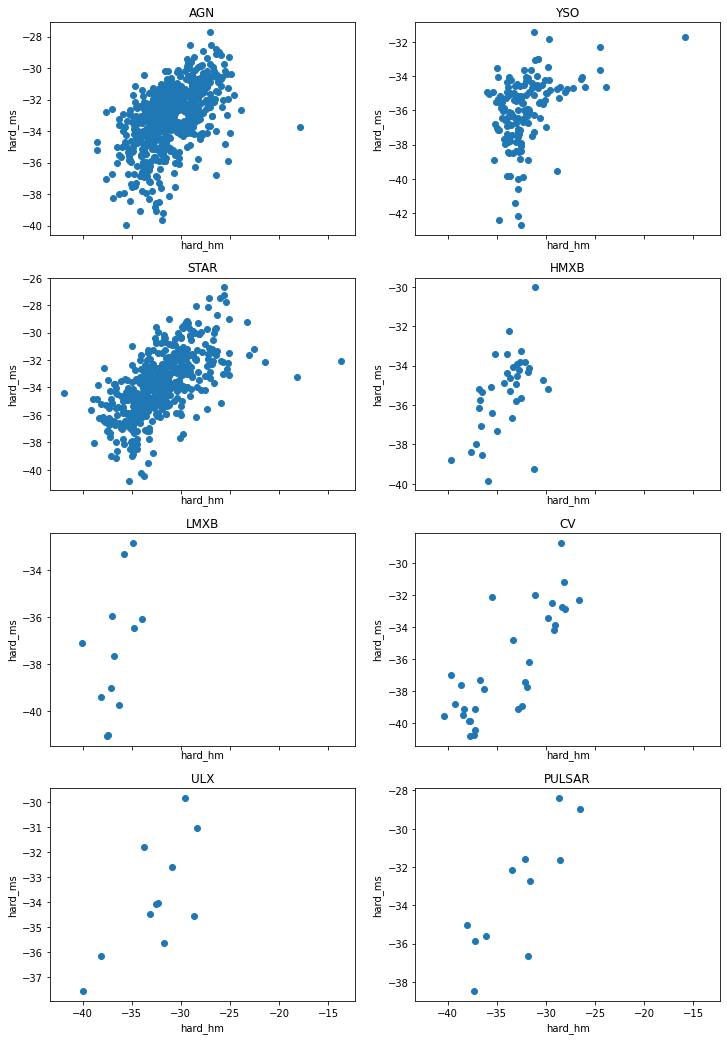

In [48]:
classes = ['AGN' , 'YSO' , 'STAR' , 'HMXB' , 'LMXB' , 'CV' , 'ULX' , 'PULSAR']
nrows  , ncols = 4 , 2 
fig , ax = plt.subplots(nrows=nrows , ncols=ncols , figsize=(12,18) ,sharex=True)
to_plot = ['hard_hm' , 'hard_ms']
cl = np.reshape(classes, ax.shape)
df = ch.copy()
for i in range(nrows):
    for j in range(ncols):
        temp = df[df['class']==cl[i][j]]
        temp = temp[~temp['h-csc'].isna()]
        temp = temp[~temp['m-csc'].isna()]
        temp = temp[~temp['s-csc'].isna()]
        #temp = temp[~temp['h-csc'].isna()]
        x = temp['h-csc']-temp['m-csc']
        y = temp['m-csc']-temp['s-csc']
        #print(len(x) , len(y))
        ax[i][j].scatter(np.log(x),np.log(y) , label = cl[i][j])
        ax[i][j].set_xlabel(to_plot[0])
        ax[i][j].set_ylabel(to_plot[1])
        ax[i][j].set_title(cl[i][j])
plt.show()


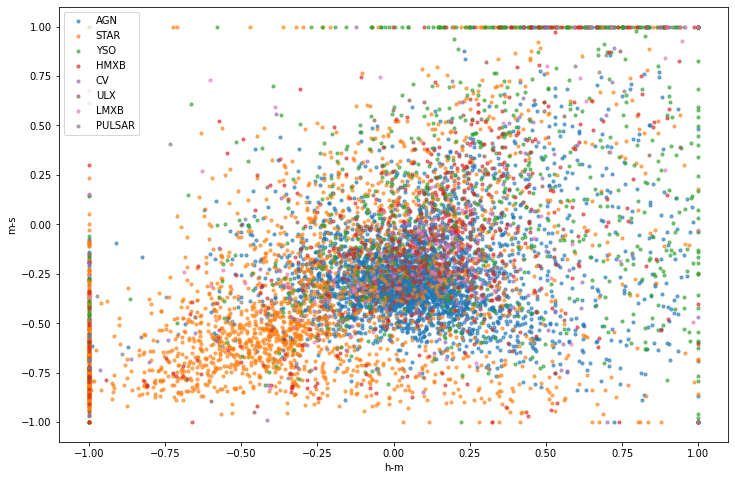

In [68]:
classes = ch['class'].value_counts().index.to_list()
nrows  , ncols = 1 , 1 
fig , ax = plt.subplots(nrows=nrows , ncols=ncols , figsize=(12,8) ,sharex=True)
to_plot = ['hard_hm' , 'hard_ms']
#cl = np.reshape(classes, ax.shape)
df = ch.copy()
for cl in classes:
    temp = df[df['class']==cl]
    temp = temp[~temp['h-csc'].isna()]
    temp = temp[~temp['m-csc'].isna()]
    temp = temp[~temp['s-csc'].isna()]
    #temp = temp[~temp['h-csc'].isna()]
    x = temp['h-csc']-temp['m-csc']
    y = temp['m-csc']-temp['s-csc']
    #print(len(x) , len(y))
    #ax.scatter(np.log(x),np.log(y) , label = cl , s=10 , alpha=0.6)
    ax.scatter(temp['hard_hm'],temp['hard_ms'] , label = cl , s=10 , alpha=0.6)
    ax.set_xlabel('h-m')
    ax.set_ylabel('m-s')
    #ax.set_title(cl[i][j])
plt.legend()
plt.show()
